In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import metrics
import xgboost as xgb

In [40]:
#Import training and validation data
df = pd.read_csv('build/training_data.csv')
lbl = df['label']
df = df.drop(columns='label')

Xtrain,Xtest, ytrain, ytest = train_test_split(df, lbl, test_size = 0.3, random_state = 555)
df

,LineFit_TTParams.lf_vel_z,HitStatisticsValues.max_pulse_time,SplineMPEFitParams.rlogl,HitStatisticsValues.z_travel,SplineMPEDirectHitsA.n_dir_strings,LineFit_TT.zenith,NewAtt.DeltaZd,MuEXAngular4.zenith,NewAtt.SplineVerRadius,SplineMPEDirectHitsA.n_dir_doms,...,MPEFitParaboloid.zenith,SplineMPETruncatedEnergy_SPICEMie_AllBINS_MuEres.value,MPEFitParaboloidFitParams.zenith,SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value,SPEFit2Bayesian.z,SplineMPECharacteristics.track_hits_separation_length,SplineMPEDirectHitsC.n_dir_doms,LineFit_TTParams.lf_vel,HitStatisticsValues.z_min,MPEFitParaboloidFitParams.err1
0,0.251636,12209.985352,9.523651,48.784487,1.0,2.697268,0.122561,2.823515,548.585271,4.0,...,2.838292,0.467407,2.838292,0.499311,-434.019317,88.226954,6.0,0.278698,-506.619995,0.121473
1,0.298297,12341.955078,7.914031,94.366666,1.0,2.515432,0.002977,2.523506,424.722006,4.0,...,2.484025,0.378125,2.484025,0.397956,-322.479420,228.615373,11.0,0.368139,-506.510010,0.077205
2,-0.037250,10837.000000,10.310048,-23.873332,1.0,1.435580,0.188195,1.602265,573.934705,1.0,...,1.580035,0.467407,1.580035,0.473491,479.857985,184.875240,5.0,0.276326,404.019989,0.091829
3,0.103723,11604.177734,8.728851,-5.420231,2.0,2.130484,0.266040,1.869607,475.722379,2.0,...,2.285744,0.467407,2.285744,0.499311,-409.167450,-32.805868,5.0,0.195363,-509.089996,0.109195
4,0.123031,11710.000000,8.998883,49.686901,2.0,2.021835,0.034437,1.982525,258.357216,4.0,...,1.927218,0.378125,1.927218,0.451037,-290.882609,376.611668,8.0,0.282245,-403.200012,0.077787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35647,-0.024537,13151.537109,8.518213,-21.456337,1.0,1.468007,0.208541,1.658946,289.262152,1.0,...,1.644896,0.378125,1.644896,0.499311,-407.234030,350.443656,7.0,0.239130,-505.410004,0.057462
35648,0.213216,11970.731445,7.771902,122.229997,1.0,2.347054,0.131378,2.466827,452.544177,5.0,...,2.468555,0.467407,2.468555,0.473491,-585.038740,300.579884,11.0,0.304327,-503.029999,0.042526
35649,-0.031909,11973.139648,9.099672,-22.644287,1.0,1.466016,0.062818,1.510776,393.757987,1.0,...,1.542135,0.378125,1.542135,0.499311,475.119207,252.527885,7.0,0.305086,430.579987,0.041111
35650,0.064641,12166.409180,7.474558,24.330513,3.0,1.846840,0.144864,1.994019,184.299431,4.0,...,1.991589,0.378125,1.991589,0.431275,-261.037510,195.829742,8.0,0.237172,-401.260010,0.021935


In [41]:
#Implementing training function with stratifiesKFold
def trainModel(X,y,k = 5):
    skf = StratifiedKFold(n_splits=k, random_state=555, shuffle=True)
    model = []
    for _, (train_index, test_index) in zip(tqdm(range(k)), skf.split(X, y)):
        bdt = xgb.XGBClassifier(tree_method='hist', random_state=555, objective='binary:logistic'
                              , early_stopping_rounds=10, eval_metric=["logloss"])
        
        bdt.fit(X.to_numpy()[train_index], y.to_numpy()[train_index],
                eval_set=[(X.to_numpy()[test_index], y.to_numpy()[test_index])]);
        model.append(bdt)
    return model

model = trainModel(Xtrain,ytrain, 5)

  0%|                                                     | 0/5 [00:00<?, ?it/s]

[0]	validation_0-logloss:0.49842
[1]	validation_0-logloss:0.38606
[2]	validation_0-logloss:0.31414
[3]	validation_0-logloss:0.26337
[4]	validation_0-logloss:0.22774
[5]	validation_0-logloss:0.20119
[6]	validation_0-logloss:0.17945
[7]	validation_0-logloss:0.16474
[8]	validation_0-logloss:0.15294
[9]	validation_0-logloss:0.14396
[10]	validation_0-logloss:0.13694
[11]	validation_0-logloss:0.13076
[12]	validation_0-logloss:0.12592
[13]	validation_0-logloss:0.12160
[14]	validation_0-logloss:0.11827
[15]	validation_0-logloss:0.11515
[16]	validation_0-logloss:0.11311
[17]	validation_0-logloss:0.11133
[18]	validation_0-logloss:0.10970
[19]	validation_0-logloss:0.10858
[20]	validation_0-logloss:0.10686
[21]	validation_0-logloss:0.10586
[22]	validation_0-logloss:0.10505
[23]	validation_0-logloss:0.10437
[24]	validation_0-logloss:0.10419
[25]	validation_0-logloss:0.10377
[26]	validation_0-logloss:0.10333
[27]	validation_0-logloss:0.10253
[28]	validation_0-logloss:0.10183
[29]	validation_0-loglos

 20%|█████████                                    | 1/5 [00:02<00:11,  2.97s/it]

[0]	validation_0-logloss:0.49745
[1]	validation_0-logloss:0.38353
[2]	validation_0-logloss:0.31001
[3]	validation_0-logloss:0.25864
[4]	validation_0-logloss:0.22178
[5]	validation_0-logloss:0.19484
[6]	validation_0-logloss:0.17426
[7]	validation_0-logloss:0.15914
[8]	validation_0-logloss:0.14816
[9]	validation_0-logloss:0.13863
[10]	validation_0-logloss:0.13141
[11]	validation_0-logloss:0.12563
[12]	validation_0-logloss:0.12103
[13]	validation_0-logloss:0.11793
[14]	validation_0-logloss:0.11438
[15]	validation_0-logloss:0.11177
[16]	validation_0-logloss:0.10950
[17]	validation_0-logloss:0.10778
[18]	validation_0-logloss:0.10547
[19]	validation_0-logloss:0.10498
[20]	validation_0-logloss:0.10383
[21]	validation_0-logloss:0.10351
[22]	validation_0-logloss:0.10280
[23]	validation_0-logloss:0.10174
[24]	validation_0-logloss:0.10113
[25]	validation_0-logloss:0.10023
[26]	validation_0-logloss:0.09939
[27]	validation_0-logloss:0.09886
[28]	validation_0-logloss:0.09854
[29]	validation_0-loglos

 40%|██████████████████                           | 2/5 [00:05<00:07,  2.47s/it]

[0]	validation_0-logloss:0.49887
[1]	validation_0-logloss:0.38617
[2]	validation_0-logloss:0.31205
[3]	validation_0-logloss:0.26216
[4]	validation_0-logloss:0.22547
[5]	validation_0-logloss:0.19734
[6]	validation_0-logloss:0.17728
[7]	validation_0-logloss:0.16234
[8]	validation_0-logloss:0.15086
[9]	validation_0-logloss:0.14187
[10]	validation_0-logloss:0.13338
[11]	validation_0-logloss:0.12953
[12]	validation_0-logloss:0.12591
[13]	validation_0-logloss:0.12318
[14]	validation_0-logloss:0.11976
[15]	validation_0-logloss:0.11770
[16]	validation_0-logloss:0.11557
[17]	validation_0-logloss:0.11323
[18]	validation_0-logloss:0.11216
[19]	validation_0-logloss:0.11123
[20]	validation_0-logloss:0.11078
[21]	validation_0-logloss:0.11024
[22]	validation_0-logloss:0.10892
[23]	validation_0-logloss:0.10821
[24]	validation_0-logloss:0.10797
[25]	validation_0-logloss:0.10754
[26]	validation_0-logloss:0.10787
[27]	validation_0-logloss:0.10786
[28]	validation_0-logloss:0.10790
[29]	validation_0-loglos

 60%|███████████████████████████                  | 3/5 [00:07<00:05,  2.55s/it]

[0]	validation_0-logloss:0.50114
[1]	validation_0-logloss:0.38841
[2]	validation_0-logloss:0.31599
[3]	validation_0-logloss:0.26614
[4]	validation_0-logloss:0.22899
[5]	validation_0-logloss:0.20091
[6]	validation_0-logloss:0.18318
[7]	validation_0-logloss:0.16694
[8]	validation_0-logloss:0.15440
[9]	validation_0-logloss:0.14605
[10]	validation_0-logloss:0.13892
[11]	validation_0-logloss:0.13375
[12]	validation_0-logloss:0.12869
[13]	validation_0-logloss:0.12490
[14]	validation_0-logloss:0.12195
[15]	validation_0-logloss:0.12002
[16]	validation_0-logloss:0.11765
[17]	validation_0-logloss:0.11623
[18]	validation_0-logloss:0.11442
[19]	validation_0-logloss:0.11298
[20]	validation_0-logloss:0.11198
[21]	validation_0-logloss:0.11112
[22]	validation_0-logloss:0.11019
[23]	validation_0-logloss:0.10995
[24]	validation_0-logloss:0.10938
[25]	validation_0-logloss:0.10851
[26]	validation_0-logloss:0.10777
[27]	validation_0-logloss:0.10711
[28]	validation_0-logloss:0.10701
[29]	validation_0-loglos

 80%|████████████████████████████████████         | 4/5 [00:10<00:02,  2.47s/it]

[0]	validation_0-logloss:0.50090
[1]	validation_0-logloss:0.39046
[2]	validation_0-logloss:0.31750
[3]	validation_0-logloss:0.26652
[4]	validation_0-logloss:0.23048
[5]	validation_0-logloss:0.20514
[6]	validation_0-logloss:0.18506
[7]	validation_0-logloss:0.16832
[8]	validation_0-logloss:0.15654
[9]	validation_0-logloss:0.14776
[10]	validation_0-logloss:0.13998
[11]	validation_0-logloss:0.13379
[12]	validation_0-logloss:0.12832
[13]	validation_0-logloss:0.12389
[14]	validation_0-logloss:0.12086
[15]	validation_0-logloss:0.11783
[16]	validation_0-logloss:0.11466
[17]	validation_0-logloss:0.11270
[18]	validation_0-logloss:0.11097
[19]	validation_0-logloss:0.11012
[20]	validation_0-logloss:0.10908
[21]	validation_0-logloss:0.10797
[22]	validation_0-logloss:0.10679
[23]	validation_0-logloss:0.10590
[24]	validation_0-logloss:0.10569
[25]	validation_0-logloss:0.10490
[26]	validation_0-logloss:0.10395
[27]	validation_0-logloss:0.10405
[28]	validation_0-logloss:0.10382
[29]	validation_0-loglos

100%|█████████████████████████████████████████████| 5/5 [00:12<00:00,  2.54s/it]


In [42]:
#Implementing prediction
def predict(model, X):
    res = []
    for m in model:
        res.append(m.predict_proba(X)[:,1])
    return np.mean(res, axis = 0)

ypred = predict(model, Xtest.to_numpy())
ypred

array([9.9993867e-01, 9.9982947e-01, 9.9996889e-01, ..., 4.4560861e-03,
       5.6346469e-03, 3.0230265e-04], dtype=float32)

0.993818050066609


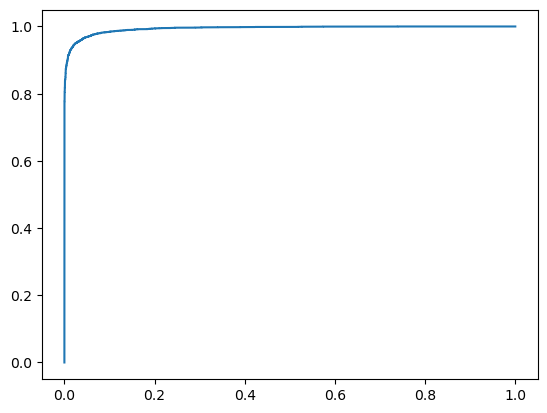

In [43]:
#Calc ROC,AUC curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred)
plt.plot(fpr,tpr);
AUC = metrics.roc_auc_score(ytest, ypred)
print(AUC)

In [44]:
#save ROC,AUC curve to disk
file = open('build/BdtRoc.txt', 'w')
file.write('#fpr tpr\n')
for f, t in zip(fpr, tpr):
    file.write(f'{f} {t}\n')
file.write(f'-1 {AUC}')
file.close()

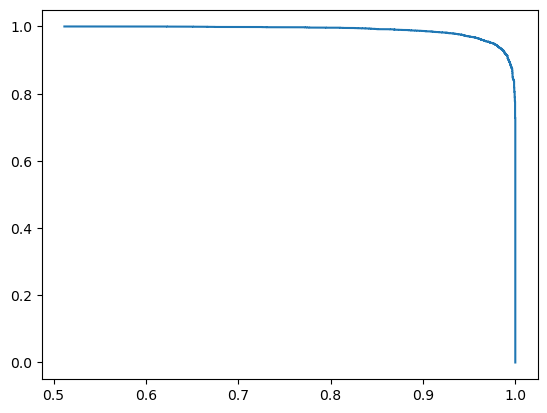

In [45]:
#Calc Precision Recall curve
prec, rec, thresh = metrics.precision_recall_curve(ytest, ypred)

plt.plot(prec, rec)

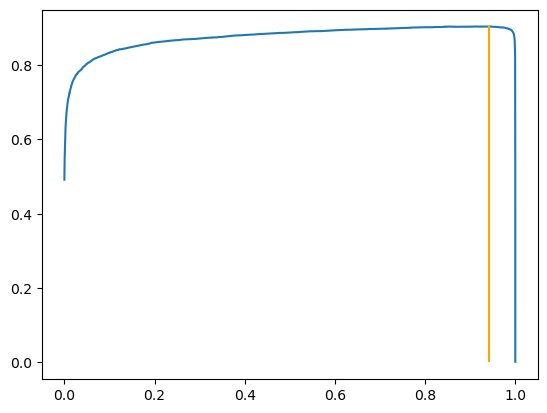

In [46]:
#Find Threshold with fbeta score
def fbeta(p, r, beta = 0.1):
    return (1+beta**2)*(p*r)/(beta*p+r)

fb = fbeta(prec, rec)[:-1]
argTr = np.argmax(fb)
plt.plot(thresh, fb)
plt.vlines(thresh[argTr], 0, fb[argTr], color = 'orange', label = 'peak')



In [65]:
#classify test data
dftest = pd.read_csv('test.csv', usecols = df.columns).reindex(columns = df.columns)


ypred_test = predict(model, dftest)

threshold = thresh[argTr]
ycls = ypred_test > threshold
ycls = [1 if i else 0 for i in ycls]

In [66]:
#save ROC,AUC and fbeta curve to disk
file = open('build/BdtPRC.txt', 'w')
file.write('#Precision Recal\n')
for f, t,b in zip(prec[:-1], rec[:-1], fb):
    file.write(f'{f} {t} {b}\n')
file.close()

In [67]:
#save predictions
file = open('build/BdtClassified.txt', 'w')
file.write('#label\n')
for f in ycls:
    file.write(f'{f}\n')
file.close()